* Run on KERAS for LSTM, DL
* Code from Nam 
https://github.com/NamNguyen2015/TFM/blob/main/codes/TFM_Nam.ipynb?fbclid=IwAR164J-mRvMrTpCb96_Ag49VJ79a0MclimlEWLEzkd8te4jBHFJLDZZ7jZg

* cleaned data
https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Datas_cleaned/Brazil_Energy%20balance%20matrix_cleaned.xlsx?fbclid=IwAR10RWB5Cey70nSRzzVI5p78Tj3CUW6OxkX1eJXAfFiDooemH5bI3cOlSPY


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os



# I. About the dataset

We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

The calculations for data processing base on the **Manual Olade 2011**

## I.1 Load the dataset

In [2]:
# Load the file
file_path = 'Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)

for k in Dict.keys():       
    # Round the values of each column in dataframe with 2 decimals
    Dict[k]=Dict[k].applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    #Ignor the first row (unit) in each df
    Dict[k]=Dict[k][1:]
    
    #Rename of columns in df
    Dict[k].rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True)   
    
    # Remove space in column names and Sector names
    Dict[k].columns=Dict[k].columns.str.strip()
    Dict[k].SECTOR=Dict[k].SECTOR.str.strip()
  
        
    
    
print(Dict.keys())

# Convert the keys of Dict to only contain the year
for k in list(Dict.keys()):
    k_new = k.split(' - ')[0]
    Dict[k_new] = Dict.pop(k)
    
    Dict[k_new]["Year"]=k_new
        
print('\n')
print(Dict.keys())



FileNotFoundError: [Errno 2] No such file or directory: 'Brazil_Energy balance matrix.xlsx'

In [ ]:
df_2021=Dict['2021']

In [ ]:
df_2021.columns  

#LPG stands for Liquefied Petroleum Gas

## I.2 Frist visualization of energy balance (Supply-Transformation-Consumption)

In [ ]:
Dict1=Dict.copy()

for k in Dict1.keys():
    selected_columns = ['SECTOR', 'TOTAL PRIMARIES', 'TOTAL SECUNDARIES', 'TOTAL','Year']
    Dict1[k]=Dict1[k][selected_columns]
    selected_rows=['TOTAL SUPPLY','TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict1[k]=Dict1[k][Dict1[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict1.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    
# Get the df "TOTAL SUPPLY"

df_TS=df_conc.loc[df_conc["SECTOR"]=="TOTAL SUPPLY"].drop(columns=["SECTOR"], axis=1)



df_TT=df_conc.loc[df_conc["SECTOR"]=="TOTAL TRANSFORMATION"].drop(columns=["SECTOR"], axis=1)


# Get the df "FINAL CONSUMPTION"

df_TC=df_conc.loc[df_conc["SECTOR"]=="FINAL CONSUMPTION"].drop(columns=["SECTOR"], axis=1)



df_TS.head()

In [ ]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', label='Total Supply', ax=ax)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', label='Total Transformation', ax=ax)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', label='Total Consumption', ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Total Supply, Transformation, and Consumption vs Year')
ax.set_xticks(df_TS.index[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

## I.3 SUPPLY

### I.3.1. Preview the Total Supply of Primary Sources

The primary sources include: **'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY'**

In [ ]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS1 = df_TS1.apply(lambda column: column.fillna(0))
    
df_TS1.head()


In [ ]:
# Check if any columns have negative values
def negative_values(df):
    columns_with_negative_values = df.columns[df.lt(0).any()]
    # Count the number of negative values in each column
    negative_values_count = df.lt(0).sum()

    # Print the columns with negative values (if any)
    if not columns_with_negative_values.empty:
        print("Columns with negative values:")
        print(columns_with_negative_values)
        # Print the count of negative values in each column
        print("Number of negative values in each column:")
        print(negative_values_count)
    else:
        print("No columns have negative values.")
        
negative_values(df_TS1)

In [ ]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Separate the positive and negative parts of the 'NUCLEAR' column
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()

# Plot the stack plot for positive and negative parts separately
plt.figure(figsize=(10, 6))  # Set the figure size if needed
ax = df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7)
positive_nuclear.plot(kind='area', ax=ax, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax, color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Prymary Energy Supply')
plt.title('Primary Energy Supply Over the Years')

# Move the legend directly to the figure
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

In [ ]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns = ['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY']
df_TS1_percentages = (df_stackplot[percentage_columns].div(df_TS1['TOTAL PRIMARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First stack plot for Primary Energy Supply
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
#negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()
df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax1)#drop(columns='NUCLEAR').
positive_nuclear.plot(kind='area', ax=ax1, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax1, color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Supply')
ax1.set_title('Primary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Second stack plot for Percentage of Primary Energy Supply
positive_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(lower=0)
#negative_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(upper=0).abs()
df_TS1_percentages.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax2)
positive_nuclear_percent.plot(kind='area', ax=ax2, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear_percent.plot(kind='area', ax=ax2, color='red', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Primary Energy Supply (%)')
ax2.set_title('Percentage of Primary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [ ]:
df_2021.SECTOR

In [ ]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['IMPORT', 'EXPORT']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_IMP_EXP=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_IMP_EXP = df_IMP_EXP.apply(lambda column: column.fillna(0))
    
df_IMP_EXP.head(5)


### I.3.2 Preview of the Total Supply of secondary energy sources

The secondary energy ensources include: **'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY'**

In [ ]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR',  'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY', 'TOTAL SECUNDARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS2=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS2 = df_TS2.apply(lambda column: column.fillna(0))
    
df_TS2.head()

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
       'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
       'OTHER SECONDARY', 'NON-ENERGY']
df_TS2_percentages = (df_TS2[percentage_columns_2].div(df_TS2['TOTAL SECUNDARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [ ]:
negative_values(df_TS2)

In [ ]:
# Drop the 'TOTAL SECUNDARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS2.drop(columns="TOTAL SECUNDARIES")
# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Secondary Energy Supply')
ax1.set_title('Secondary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_TS2_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Secondary Energy Supply (%)')
ax2.set_title('Percentage of Secondary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

## I.4 CONSUMPTION




**Antonio's notes:**

Pronosticar y analizar consumos energéticos:

 -Balance Eurostat
 
 -Balance España
 
Desagregar el consumo por destino

Evolución de los consumos:

 -Patrón
 
 -Correlaciones
 
 -Tipos de consumo
 
 -Relación entre Incremento económico (ciclos económicos de crecimiento)
 
                          Incremento consumo energético
                          
Análisis integrado con todos los consumos y ver si el abastecimiento, es decir, la oferta.

Validar los "nan" de cada fuente primaria de Brasil

Evaluar la industrialización de Brasil a futuro para ver como va a influir en su consumo

¿Es exportador de energía Brasil?

Pérdidas de energía eléctrica por distribución

Capacidad operativa de energía hidroeléctrica por las capacidades hídricas de los ríos


**Edu's notes:**

Entiendo que nos dice que hay que que ver la evolución del consumo en cuanto a los suministros

Relación oferta y demanda por segmentos en las series temporales

De esa forma también podriamos ver la correlación entre las variables (positivas/negativas) en estas series temporales que en Brasil han influido en la demanda/oferta en los diferentes segementos en las series temporales y así se veria la evolución

En cuanto a los escenarios, no se como plantearlos, se me ocurre algo pero necesito vuestra opinión:

Escenario con un aumento o disminución de la población lo que reflejaría un cambio en el consumo final energético.

Escenario con un aumento o disminución de la economía brasileña y su impacto en el consumo final energético.

Escenario de un desarrollo tecnológico que muestre su impacto en el consumo final energético

In [ ]:
df_2021

In [ ]:
df_2021.SECTOR.unique()

In [ ]:
Dict2=Dict.copy()

for k in Dict2.keys():
   # selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
    #   'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    selected_columns = ['SECTOR','TOTAL','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','ENERGY CONSUMPTION', 'FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    #df_TC1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TC1 = df_conc.apply(lambda column: column.fillna(0))
    
df_TC1.tail(10)

In [ ]:
# Group by Year and SECTOR, and sum the TOTAL values
grouped_df = df_TC1.groupby(['Year', 'SECTOR'])['TOTAL'].sum().reset_index()

grouped_df.tail(6)

# Pivot the data
pivot_df = grouped_df.pivot(index='Year', columns='SECTOR', values='TOTAL')


# Display the result
pivot_df.tail()



In [ ]:
# Dataframe Energy Consumption (EC)
df_EC=pivot_df.drop(columns=['ENERGY CONSUMPTION'])
df_EC.head()

In [ ]:
# Drop the 'FINAL CONSUMPTION' column and calculate the percentages
df_percentages = (df_EC.drop(columns=['FINAL CONSUMPTION']).div(df_EC['FINAL CONSUMPTION'], axis=0) * 100)
df_percentages = df_percentages.round(0)

df_percentages.tail(20)

In [ ]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_EC.drop(columns=["FINAL CONSUMPTION"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [ ]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [ ]:

list_correlacion=data.columns

In [ ]:
df_correlacion = data[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

In [ ]:
for i in list_correlacion:
    sns.boxplot(x=data[i])
    print(i)
    plt.show()

In [ ]:
def saca_metricas(y_real, y_pred): 
    false_positive_rate, recall, thresholds = roc_curve(y_real, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    print('- AUC: {roc_auc}')
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [ ]:
#models_rcv = {
 #   "XGB": XGBClassifier(n_jobs=-1, n_estimators=30, random_state=1234),
  #  "RF": RandomForestClassifier(n_estimators =30, n_jobs=-1, random_state=1234),
  #  "Tree": DecisionTreeClassifier(random_state=1234),
  #  "Log": LogisticRegression(solver="newton-cg", penalty="l2"),
#}

def rskf_comparison(models, X_train, y_train):
    
    results = []
    names = []

    for k, v in models.items():
    
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234) 
        cv_scores = cross_val_score(v, X_train, y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')
        
    
    return(results, names)


#results, names = rskf_comparison(models_rcv, X_train, y_train)
#plt.figure(figsize=(10, 6))
#comparison = plt.boxplot(results)
#plt.xticks(np.arange(1,len(names)+1),names)
#plt.show(comparison)

In [ ]:
#grid_param = {
#    'n_estimators': [100,300,500],
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [16,20,22,24],
#    'max_features': ['auto', 'sqrt'],

#}

When dealing with time series prediction problems, some **suitable models** are :

Autoregressive Integrated Moving Average (ARIMA)

Seasonal Autoregressive Integrated Moving-Average (SARIMA):

Seasonal Decomposition of Time Series (STL)

Exponential Smoothing (ETS)

Long Short-Term Memory (LSTM)

Gated Recurrent Units (GRU)

Convolutional Neural Networks (CNNs)

**Here's a high-level outline of how you might approach creating such a pipeline:**

### 1. Data Preparation:

Load and preprocess your time series data.
Convert the target variable to numerical values if needed.
### 2. Model Selection:

Define a list of time series forecasting models you want to consider (ARIMA, SARIMA, STL, ETS, LSTM, GRU, CNNs).
Define hyperparameters for each model, if applicable.

### 3. Pipeline Creation:

For each model in the list, create a separate pipeline that includes data preprocessing, model fitting, and prediction.

### 4.Model Evaluation:

Use appropriate time series evaluation metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error) to evaluate the performance of each model on a validation set.

### 5. Model Selection:

Compare the performance metrics of each model to identify the best-performing model.
Select the model with the lowest error or the best fit for your problem.

### 6. Fine-Tuning and Validation:

If needed, perform hyperparameter tuning on the selected model using techniques like grid search or random search.
Validate the tuned model on a separate test set to ensure its generalization performance.

### 7. Final Model and Deployment:

Once you have identified the best model, train it on the entire dataset (including training and validation data).
Deploy the final model for making predictions on new data.

### 1. Data Preparation:

In [ ]:
#Load data of economy
economic_demographic_data = pd.read_excel('Brasil_indices.xlsx', index_col='Año')

cols=economic_demographic_data.columns
print(cols)

In [ ]:
economic_demographic_data.shape

In [ ]:
economic_demographic_data.tail(20)

In [ ]:
selected_cols=cols[:6]

In [ ]:
df1=economic_demographic_data[selected_cols]

In [ ]:
data=df_EC
#Merge data
merged_df = data.merge(df1, left_index=True, right_index=True)

# Convertir el índice a tipo entero 
merged_df.index = merged_df.index.astype(int)
# Imprimir el DataFrame unido para verificar
merged_df.columns

In [ ]:
#Convert cols to English
merged_df.rename(columns={'Población':'POPULATION','PIB': 'GDP',
                          'Crecimiento población anual': 'ANNUAL POPULATION GROWTH',
                          'Tasa de natalidad': 'BIRTH RATE',
                          #'Tasa inflacion': 'INFLATION RATE',
                          'Tasas de muerte/1000 personas': 'DEATH RATES PER 1000 PEOPLE'}, inplace=True)

In [ ]:
merged_df.head()

In [ ]:
SECTORS=['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC', 'INDUSTRIAL', 'NON-ENERGY CONSUMPTION',
       'RESIDENTIAL', 'TRANSPORT', 'FINAL CONSUMPTION']

In [ ]:
FEATURES=['POPULATION',
       'GDP', 'ANNUAL POPULATION GROWTH', 'BIRTH RATE', #'INFLATION RATE',
       'DEATH RATES PER 1000 PEOPLE']


missing_values=merged_df.isnull().sum()
missing_values

## MinMaxScaler
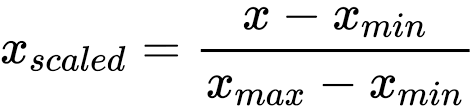

In [ ]:
merged_df.head()

In [ ]:
merged_df.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df)
scaled_df = pd.DataFrame(scaled_data, columns=merged_df.columns)
scaled_df.set_index(merged_df.index, inplace=True)

In [ ]:
scaled_df

### Running ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming you have a DataFrame named df with a target column
target='FINAL CONSUMPTION'


# Split data into train and test sets 
train_size = int(len(merged_df) * 0.80)
# data without scaling
#train, test = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

#data scaling:
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]


#X_train = train[FEATURES].values.reshape((-1, len(FEATURES), 1))
#X_test = test[FEATURES].values.reshape((-1, len(FEATURES), 1))

X_train = train[FEATURES]
X_test = test[FEATURES]
y_train=train[target]   
y_test=test[target]

combined_index = np.concatenate((train.index.values, test.index.values), axis=0)
combined_index
train

In [ ]:
# Split data into train and test sets 
train_size = int(len(scaled_df) * 0.80)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]  
X_train = train[FEATURES]
X_test = test[FEATURES]
y_train = train[target]   
y_test = test[target]

In [ ]:
train.head()

In [ ]:
test.head()

### Need to check PCAF, ACF to choose the right parameters

In [ ]:
train.head()

In [ ]:
train_cur=train[['AGRICULTURE, FISHING AND MINING']]

In [ ]:
train_cur.head()

In [ ]:
test_cur=test[['AGRICULTURE, FISHING AND MINING']]

### check stationary of the time series

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_cur)
print(f'p-value: {adf_test[1]}')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_cur)

pacf_original = plot_pacf(train_cur)

## Transform to stationary: differencing
In some cases, we  might need to apply differencing to make a time series stationary.



In [ ]:
train_diff = train_cur.diff().dropna()
train_diff.plot()

In [ ]:
acf_diff = plot_acf(train_diff)

pacf_diff = plot_pacf(train_diff)

In [ ]:
#check stationary of differencing now
#from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_diff)
print(f'p-value: {adf_test[1]}')

### (2,1,1) is the best choice, based on PACF, ACF

In [ ]:
#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_cur, order=(2,1,1)) #this combination is the best
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# prediction
forecast_test = model_fit.forecast(len(test_cur))

scaled_df['forecast'] = [None]*len(train_cur) + list(forecast_test)

scaled_df[['AGRICULTURE, FISHING AND MINING','forecast']].plot()

### check for different parameters

In [ ]:
#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_cur, order=(5,1,0)) #this combination is the best
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# prediction
forecast_test = model_fit.forecast(len(test_cur))

scaled_df['forecast'] = [None]*len(train_cur) + list(forecast_test)

scaled_df[['AGRICULTURE, FISHING AND MINING','forecast']].plot()

### Next research
* mutivariate VAR: 
* Kalman filter